In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#load dataset
df = pd.read_csv("Netflix.csv")
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10/6/2023,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,5/9/2021,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10/7/2022,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,1/5/2023,28-06-23,Germany,33,Male,Smartphone,1 Month


In [3]:
#check duplicate
df.duplicated().sum()

0

In [4]:
#Check missing values
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

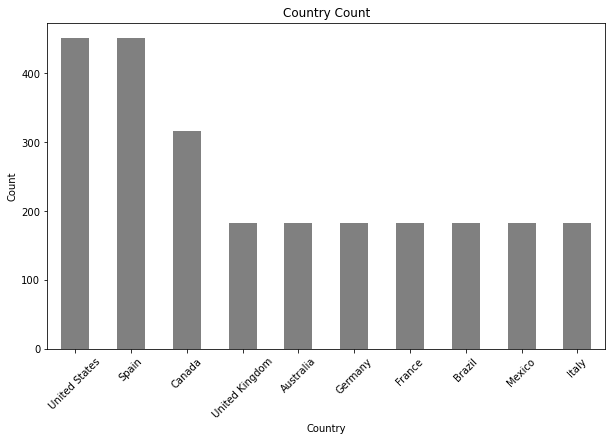

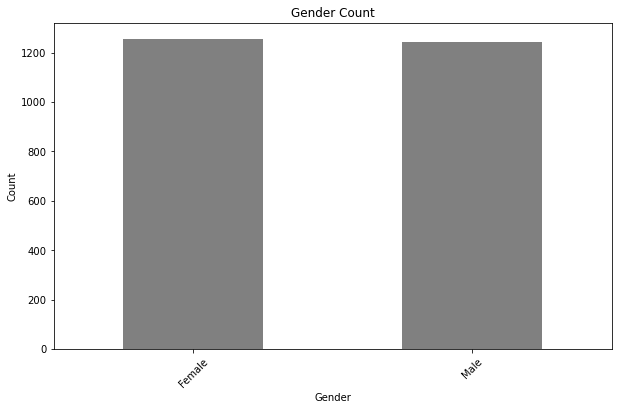

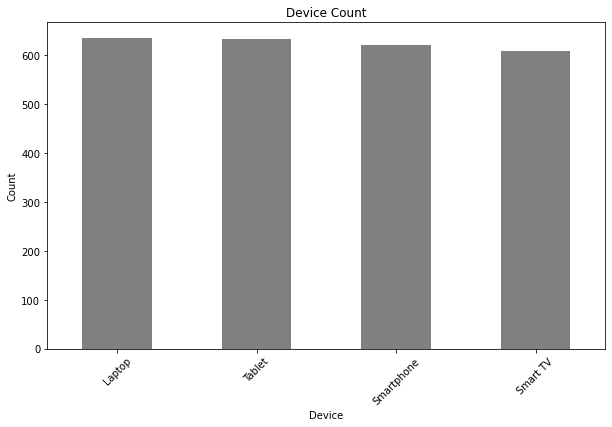

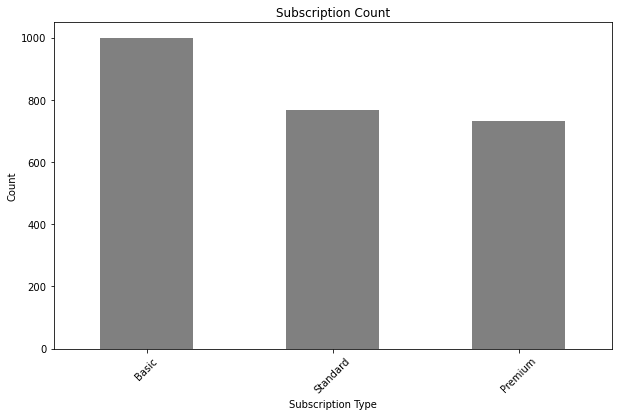

In [5]:
columns_title = {"Country":"Country Count",
                "Gender": "Gender Count",
                "Device" : "Device Count",
                "Subscription Type" : "Subscription Count"
                }
for column, value in columns_title.items():
    plt.figure(figsize = (10, 6))
    df[column].value_counts().plot(kind = "bar", color = "grey")
    plt.title(value)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation = 45)
    plt.show()

In [6]:
user_count_by_country = df['Country'].value_counts().reset_index()
user_count_by_country.columns = ['Country', 'User Count']

#import plotly.express library
import plotly.express as px

In [7]:
fig = px.choropleth(user_count_by_country, locations = "Country", locationmode = "country names", color = "User Count",
                   hover_name = "Country", title = 'User Distribution By Country',
                   color_continuous_scale = px.colors.sequential.Plasma)
fig.update_layout(
    width = 1000,
    height = 400,
    title_font_size = 24,
    geo = dict(
        showframe = False,
        showcoastlines = False
    )
)

fig.show()

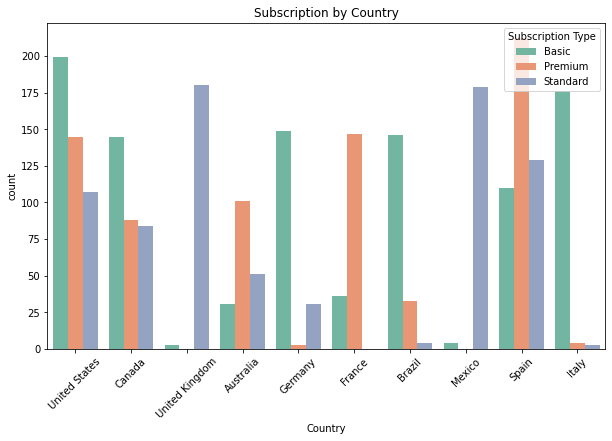

In [8]:
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Country', hue = "Subscription Type", palette = "Set2")
plt.title('Subscription by Country')
plt.xticks(rotation = 45)
plt.show()

In [9]:
sub_by_country = df.pivot_table(index = 'Country', columns = "Subscription Type", values = "User ID", aggfunc = 'count',
                               fill_value = 0)
sub_by_country

Subscription Type,Basic,Premium,Standard
Country,,,
Australia,31,101,51
Brazil,146,33,4
Canada,145,88,84
France,36,147,0
Germany,149,3,31
Italy,176,4,3
Mexico,4,0,179
Spain,110,212,129
United Kingdom,3,0,180


In [10]:
sub_by_country['Total'] = sub_by_country.sum(axis = 1)
sub_by_country

Subscription Type,Basic,Premium,Standard,Total
Country,,,,
Australia,31,101,51,183
Brazil,146,33,4,183
Canada,145,88,84,317
France,36,147,0,183
Germany,149,3,31,183
Italy,176,4,3,183
Mexico,4,0,179,183
Spain,110,212,129,451
United Kingdom,3,0,180,183


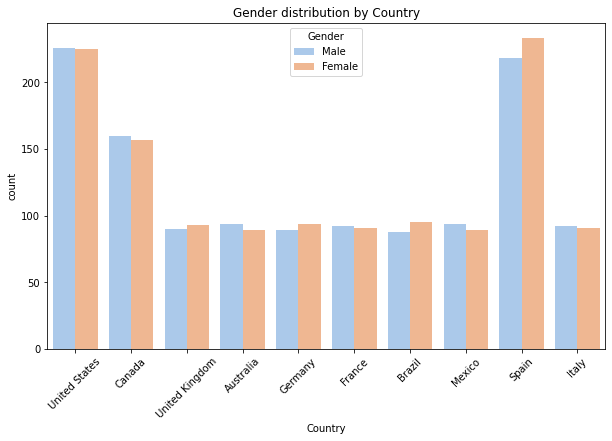

In [11]:
#Visualization of Gender distribution by country
plt.figure(figsize = (10,6))
sns.countplot(data = df, x = 'Country', hue = 'Gender', palette = 'pastel')
plt.title('Gender distribution by Country')
plt.xticks(rotation = 45)
plt.show()

In [12]:
gender_by_country = df.pivot_table(index = "Country", columns = 'Gender', values = 'User ID', aggfunc = 'count',
                                  fill_value = 0)
gender_by_country

Gender,Female,Male
Country,,
Australia,89,94
Brazil,95,88
Canada,157,160
France,91,92
Germany,94,89
Italy,91,92
Mexico,89,94
Spain,233,218
United Kingdom,93,90


In [13]:
#to add columns to our table
sub_by_gender = df.pivot_table(index = 'Country', columns = ['Gender', 'Subscription Type'], values = 'User ID',
                                   aggfunc = 'count', fill_value = 0)
sub_by_gender

Gender            Female                   Male                 
Subscription Type  Basic Premium Standard Basic Premium Standard
Country                                                         
Australia             16      45       28    15      56       23
Brazil                78      16        1    68      17        3
Canada                68      40       49    77      48       35
France                17      74        0    19      73        0
Germany               80       1       13    69       2       18
Italy                 86       3        2    90       1        1
Mexico                 2       0       87     2       0       92
Spain                 60     113       60    50      99       69
United Kingdom         2       0       91     1       0       89
United States        103      72       50    96      73       57

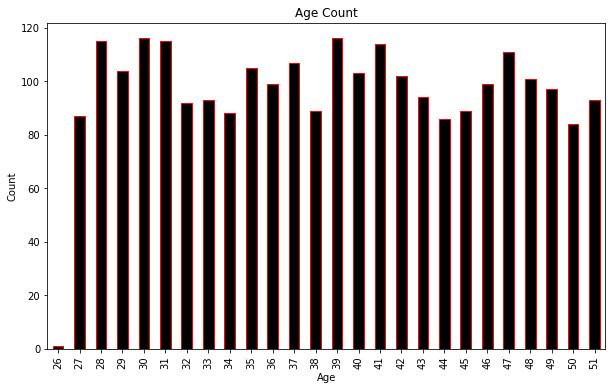

In [14]:
#Visualization by ages
plt.figure(figsize= (10,6))
df['Age'].value_counts().sort_index().plot(kind='bar', color = 'black', edgecolor='red')
plt.title("Age Count")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [15]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10/6/2023,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,5/9/2021,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10/7/2022,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,1/5/2023,28-06-23,Germany,33,Male,Smartphone,1 Month


In [16]:
#Duration of customers
df['Join Date'] = pd.to_datetime(df['Join Date'], errors = 'coerce')
                                 
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], errors = 'coerce')

In [17]:
df['Duration'] = (df['Last Payment Date'] - df['Join Date']).dt.days
df['Duration Months'] =df['Duration'].apply(lambda x: math.ceil(x/30))

In [18]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration Months
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629,21
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774,26
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262,9
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174,6


In [19]:
Average_Monthly_Duration = df['Duration Months'].mean()
print(f"Average_Duration: {Average_Monthly_Duration}")

Average_Duration: 11.3648


In [20]:
#Create revenue column
df['Revenue'] = df['Monthly Revenue'] * df['Duration Months']
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Duration,Duration Months,Revenue
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,629,21,210
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,774,26,390
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,119,4,48
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,262,9,108
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,174,6,60


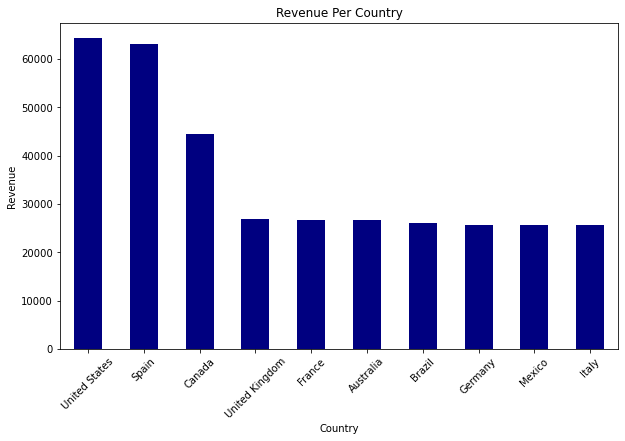

In [21]:
revenue_per_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending = False)

plt.figure(figsize = (10, 6))
revenue_per_country.plot(kind = 'bar', color = "navy")
plt.title("Revenue Per Country")
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.xticks(rotation = 45)
plt.show()

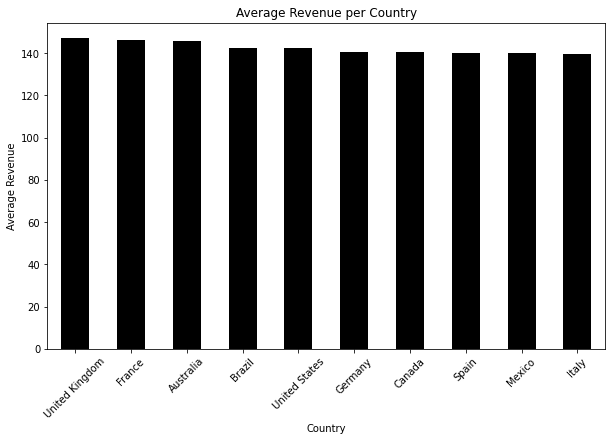

In [22]:
#average revenue by country
avg_revenue = df.groupby('Country')['Revenue'].mean().sort_values(ascending = False)

#plot bar graph
plt.figure(figsize = (10, 6))
avg_revenue.plot(kind = 'bar', color = 'black')
plt.title('Average Revenue per Country')
plt.xlabel('Country')
plt.ylabel('Average Revenue')
plt.xticks(rotation = 45)
plt.show()

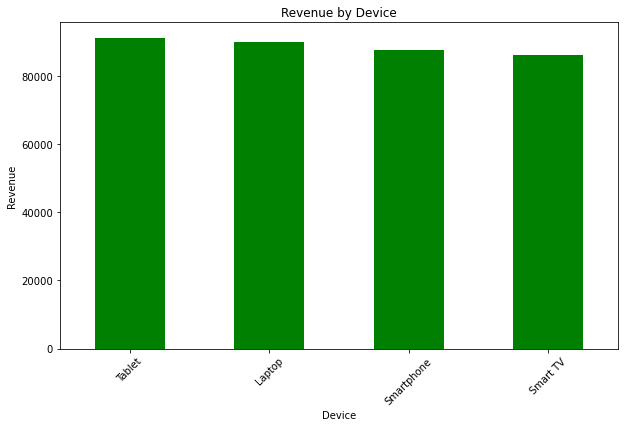

In [23]:
#Revenue by device
device_revenue = df.groupby('Device')['Revenue'].sum().sort_values(ascending = False)

#plot bar graph
plt.figure(figsize = (10,6))
device_revenue.plot(kind = "bar", color = "green")
plt.title('Revenue by Device')
plt.xlabel('Device')
plt.ylabel('Revenue')
plt.xticks(rotation = 45)
plt.show()

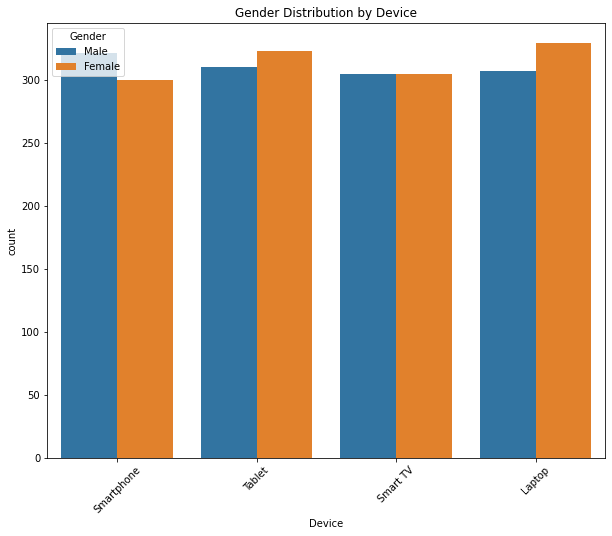

In [24]:
#Gender distribution by device
plt.figure(figsize = (10, 8))

sns.countplot(x = 'Device', hue = 'Gender', data = df)
plt.title('Gender Distribution by Device')
plt.xticks(rotation= 45)
plt.show()